In [246]:
%matplotlib inline
from __future__ import division
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from ipywidgets import interactive

def linear_model(alpha, beta, sigma, N=50, pt=1):
    xlim = (0, 10)
    x = np.linspace(xlim[0], xlim[1], N)
    xi = x[pt]
    mu = alpha + beta * x
    y_pts = np.linspace(mu[pt] - 5*sigma, mu[pt] + 5*sigma, 200)
    y_probs = norm.pdf(y_pts, scale=sigma, loc=mu[pt])
    y = np.random.randn(N)*sigma + mu
    mb = np.polyfit(x, y, 1)
    log_like = np.sum(np.log(norm.pdf((y - mu) / sigma)))
    gs = gridspec.GridSpec(nrows=1, ncols=4)
    fig = plt.figure()
    ax = fig.add_subplot(gs[:-1])
    ax2 = fig.add_subplot(gs[-1])
    fig.subplots_adjust(wspace=0.05)
    ax.plot(x, y, 'bo', markeredgewidth=0)
    ax.plot(x, mu, 'b-')
    ax.plot(x, np.polyval(mb, x), 'g-')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax2.set_xlabel("Probability")
    ax.set_xlim(np.mean(xlim) -0.52*(xlim[1]-xlim[0]), np.mean(xlim) + 0.52*(xlim[1]-xlim[0]))
    ylim = ax.get_ylim()
    xlim_ = ax.get_xlim()
    loglike_sign = '' if log_like >= 0 else '-'
    ax.text(xlim_[0]+(xlim_[1] - xlim_[0])*0.05, ylim[0]+(ylim[1] - ylim[0])*0.8, "$\log L = {}{:.1f}$\n$y_i \\sim N(mx_i + b, \\sigma)$".format(loglike_sign, abs(log_like)),
           size=14)
    ax2.set_ylim(*ylim)
    ax2.set_yticklabels([''])
    ax2.plot(y_probs, y_pts)
    ax2.scatter(norm.pdf(y[pt], scale=sigma, loc=mu[pt]), y[pt], c='', edgecolors='b')
    ax.vlines(x[pt], min(mu[pt], y[pt]),  max(mu[pt], y[pt]), )
    ax2.axhline(mu[pt], color='0.5', linestyle='--')
    ax2.axhline(y[pt], color='0.5', linestyle='--')
    ax2.set_xlim(0, norm.pdf(0)*1.1)
    ax2.set_xticklabels([''])
    return fig, ax

# Bayesian inference in Python
Ryan Dwyer *February 17, 2016*


# Motivation

![phase kick data](figs/phase-kick-151119.pdf)

- Phase kick experimental data has complicated noise profile (see shaded regions)
- Especially in organic samples with long recovery times, few data points, so worthwhile to glean as much information as possible from data


*Bayesian inference allows inferring,*

- **experimental noise**
- **sample parameters**
- **distribution of possible sample parameters and experimental noise**

*simultaneously, in a motivated way.*

# Statistics notation

<img src="linear-fit.png" width=640px>

- Consider linear regression
- $N$ data points $(x_i, y_i)$
- Model the experimental data as a line with normally distributed errors,
    $$\begin{align}
    \mu_i& = m x_i + b&\\
    y_i& \sim \mathcal{N}(\mu_i, \sigma)&
    \end{align}
    $$
    - $\sim$ means "is distributed as"
    - $\mathcal{N}(\mu, \sigma)$ means a normal distribution with mean $\mu$, standard deviation $\sigma$
- Because $y_i$ is normally distributed, each data point has a likelihood $L_i$ given by the normal distribution's probability density (see above, right),
    $$L_i = \frac{1}{\sigma \sqrt{2\pi}} \exp \left( \frac{-(y_i -\mu_i)^2}{2\sigma^2} \right )$$
- Independent data points, so the likelihood of the entire dataset is the product of the likelihood of individual data points,
    $$
    L = \prod_{i=1}^{N} L_i
    $$
- Easier to work with the log likelihood,
    $$\log L = \sum_{i=1}^{N} \log L_i \propto \sum_{i=1}^{N} \frac{-(y_i -\mu_i)^2}{2\sigma^2}$$
- Ordinary least squares gives the *maximum likelihood estimate (MLE)* for this model (green).

# Bayesian

<img src="linear-fit.png" width=640px>

- **Prior** representing initial knowledge / belief about distribution of $m$, $b$, $\sigma$
- **Likelihood** derived from model (same as above)
- **Posterior** Rather than a point estimate (MLE), compute a posterior distribution of plausible parameters values, given the **likelihood** and **prior**

<img src="figs/likelihood.png" alt="likelihood" style="width:640px">

- $\mathrm{Posterior} \propto \mathrm{Prior} \times \mathrm{Likelihood}$

**Why?** Observed data may not provide much information about a given parameter.

(<matplotlib.figure.Figure at 0x1130b0910>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11309ea10>)

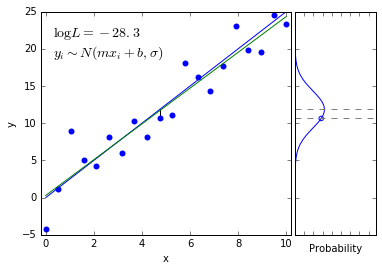

In [225]:
interactive(linear_model, alpha=0, beta=(0.1, 5, 0.1), sigma=(0.1, 5, 0.1), pt=(1, 19, 1), N=20, )

## Resources


- [Frequentism and Bayesianism: A Python-driven Primer.](http://arxiv.org/pdf/1411.5018v1.pdf)
    - This is based on a series of blog posts at [Pythonic Permutations](https://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/). Most relevant is,
- [Frequentism and Bayesianism IV: How to be a Bayesian in Python](http://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/)

### Books

- [*Stan Modeling Language User's Guide and Reference Manual*](http://mc-stan.org/documentation/)
    - Really great resource; implements basic versions of many different types of models in Stan (linear regression, time series analysis, multilevel modeling, ARMA processes, and more).
- *Doing Bayesian Data Analysis: A Tutorial with R, JAGS, and Stan.* Kruschke, J.
    - Starts from a fairly basic level. The author also has a variety of articles on his [website](http://www.indiana.edu/~kruschke/).
- *Statistical Rethinking: A Bayesian Course with Examples in R and Stan.* McElreath, R.
    - Emphasis on information theory for motivating choice of distributions, errors, priors.
- Bayesian Data Analysis. Gelman, A., *et al*.
    - Comprehensive overview, somewhat more advanced. Available online from the [Cornell library](https://newcatalog.library.cornell.edu/catalog/9204986).

## Outline

- Motivation:
- Statistics notation / terminology (with pictures)
- Brownian motion example [[notebook](LogNormalBrownian.ipynb), html]
- Different samplers?
- Scientific use cases

## Bayesian inference

<img src="figs/likelihood.png" alt="likelihood" style="width:640px">

- Generate samples from the posterior

<img src="figs/fig7-4.png" alt="likelihood" style="width:640px">

In [244]:
# fig, ax = linear_model(alpha=0, beta=2.5, sigma=3, N=15, pt=7)
a = fig.axes[0]
line = a.lines[0]
x,y = line.get_data()
x2, y2 = a.lines[1].get_data()

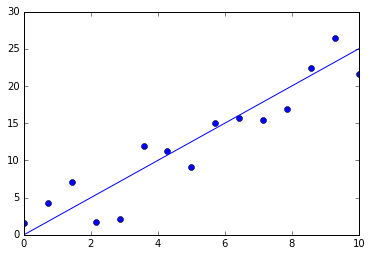

In [245]:
plt.plot(x, y, 'bo')
plt.plot(x2, y2, 'b-')

In [249]:
df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('linear.csv')

In [ ]:
# fig.savefig('linear-fit.png', dpi=300, bbox_inches='tight')